In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import spacy
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import chi2
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import cross_val_score, validation_curve

C:\Users\siddh\AppData\Local\Continuum\anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
X_train = []
X_test = []
Y_train = []
Y_test = []
X_valid = []
Y_valid = []
male = []
female = []

In [3]:
with open(r'data/training_set.txt') as training:
    for line in training:
        line = line.strip()
        lnum, chr_id, movie_id, chr_name, chr_gender, line_text, credit_list = line.split("+++$+++")
        chr_gender = chr_gender.strip()
#         ss = sid.polarity_scores(line_text)
#         sentiment = ss['compound']
        if(chr_gender.lower() == "m"):
            X_train.append(line_text)
            male.append(line_text)
            Y_train.append(0)
        elif(chr_gender.lower() == "f"):
            X_train.append(line_text)
            female.append(line_text)
            Y_train.append(1)


with open(r'data/test_set.txt') as test:
    for line in test:
        line = line.strip()
        lnum, chr_id, movie_id, chr_name, chr_gender, line_text, credit_list = line.split("+++$+++")
        chr_gender = chr_gender.strip()
#         ss = sid.polarity_scores(line_text)
#         sentiment = ss['compound']
        if(chr_gender.lower() == "m"):
            X_test.append(line_text)
            male.append(line_text)
            Y_test.append(0)
        elif(chr_gender.lower() == "f"):
            X_test.append(line_text)
            female.append(line_text)
            Y_test.append(1)




with open(r'data/validation_set.txt') as valid:
    for line in valid:
        line = line.strip()
        lnum, chr_id, movie_id, chr_name, chr_gender, line_text, credit_list = line.split("+++$+++")
        chr_gender = chr_gender.strip()
#         ss = sid.polarity_scores(line_text)
#         sentiment = ss['compound']
        if(chr_gender.lower() == "m"):
            X_valid.append(line_text)
            male.append(line_text)
            Y_valid.append(0)
        elif(chr_gender.lower() == "f"):
            X_valid.append(line_text)
            female.append(line_text)
            Y_valid.append(1)


In [4]:
X = X_train + X_test + X_valid
Y = Y_train + Y_test + Y_valid

In [5]:
indices = []
for i in range(len(X)):
  if(len(X[i]) > 0):
    answer = True 
  else:
    indices.append(i)

for index in sorted(indices, reverse=True):
    del X[index]
    del Y[index]

In [7]:

from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X, Y = oversample.fit_resample(np.array(X).reshape(-1,1), Y)

In [15]:
print(Y.count(0))
print(Y.count(1))
# df = pd.DataFrame()

# df['text'] = X
# df['target'] = Y
a = []
for phrase in X:
    a.append(phrase[0].strip())

170768
170768


In [31]:
X = a
print(len(X))
print(type(X[0]))

341536
<class 'str'>


In [20]:
df = pd.DataFrame()
df['text'] = X
df['target'] = Y

In [119]:
def get_top_data(top_n = 30000):
  top_data_df_male = df[df['target'] == 0].head(top_n)
  top_data_df_female = df[df['target'] == 1].head(top_n)
  data_df_small = pd.concat([top_data_df_male, top_data_df_female])
  return data_df_small
top_data_df_small = get_top_data(top_n=Y.count(1))


In [21]:
train_df, test_df = train_test_split(df, test_size=0.1)

In [22]:
train_data = train_df["text"]
train_target = train_df["target"]

In [23]:
test_data = test_df["text"]
test_target = test_df["target"]

In [24]:
bow_pipeline = Pipeline(
    steps=[
        ("tfidf", TfidfVectorizer()),
        ("classifier", MultinomialNB()),
    ]
)

bow_pipeline.fit(train_data, train_target)
y_pred = bow_pipeline.predict(test_data)
cr = classification_report(test_target, y_pred)

In [25]:
print(cr)

              precision    recall  f1-score   support

           0       0.67      0.55      0.60     17020
           1       0.62      0.73      0.67     17134

    accuracy                           0.64     34154
   macro avg       0.64      0.64      0.64     34154
weighted avg       0.64      0.64      0.64     34154



In [26]:
from sklearn.base import BaseEstimator, TransformerMixin

nlp = spacy.load("en_core_web_sm")

class SpacyVectorTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, nlp):
        self.nlp = nlp
        self.dim = 300
    
    def fit(self, X, y):
        return self
    
    def transform(self, X):
        #Doc.vector defaults to an average of the token vectors
        return [self.nlp(text).vector for text in X]

In [27]:
from sklearn.decomposition import TruncatedSVD
embeddings_pipeline = Pipeline(
    steps=[
        ("mean_embeddings", SpacyVectorTransformer(nlp)),
        ("classifier", RandomForestClassifier(n_estimators=200, max_depth=3)),
    ]
)

embeddings_pipeline.fit(train_data, train_target)
y_pred = embeddings_pipeline.predict(test_data)
crglove = classification_report(test_target, y_pred)

ValueError: setting an array element with a sequence.

In [ ]:
print(crglove)

In [ ]:
sid = SentimentIntensityAnalyzer()

In [45]:
from sklearn.feature_extraction import DictVectorizer
class SegmentFeaturizer:
    def __init__(self):
        self.nlp = spacy.load("en_core_web_sm")
        self.future_words = ["tomorrow", "future", "futures"]
    
    @staticmethod
    def count_propernouns(doc):
        segment = doc.text.lower().split()
        count = 0 
        num = 0
        for token in doc:
            if token.tag_ in ['NNP', 'NNPS']:
                count+=1
                num += 1
            else:
                num += 1
        if(count == 0):
            average = 0
        else:
            average = count/num
        return average

    @staticmethod
    def get_n_words_before_main_verb(doc):
        numbers = [0]
        for sent in doc.sents:
            main = [t for t in sent if t.dep_ == "ROOT"][0]
            if main.pos_ == "VERB":
                dist_to_init = main.i - sent[0].i
                numbers.append(dist_to_init)
        return np.mean(numbers)

    @staticmethod
    def get_n_complex_clauses(doc):
        embedded_elements_count = []
        for sent in doc.sents:
            n_embedded = len(
                [t for t in sent if t.dep_ in {"ccomp", "xcomp", "advcl", "dative"}]
            )
            embedded_elements_count.append(n_embedded)
        if len(embedded_elements_count) == 0:
            return 0
        else:
            return np.mean(embedded_elements_count)
    
    @staticmethod
    def get_mean_sentiment(doc):
        return doc.sentiment
    @staticmethod
    def get_pronouns(doc):
        count = 0
        num = 0
        for token in doc:
            if token.pos_ == "PRON":
                count += 1
                num += 1
            else:
                num += 1
        if count == 0 or num == 0:
            average = 0
        else:
            average = count/num
        return average
    @staticmethod
    def get_female_pronouns(doc):
        count = 0
        num = 0
        for token in doc:
            if token.text.lower() in ['her', 'she', 'wife', 'girlfriend']:
                count += 1
                num += 1
            else:
                num+=1
        if count == 0 or num == 0:
            average = 0
        else:
            average = count/num
        return average
    @staticmethod
    def get_male_pronouns(doc):
        count = 0
        num = 0
        
        for token in doc:
            if token.text.lower() in ['he', 'him', 'husband', 'honey', 'his', 'boyfriend']:
                count += 1
                num += 1
            else:
                num += 1
        if count == 0 or num == 0:
            average = 0
        else:
            average = count/num
        return average
    def get_swear_words(doc):
        count = 0
        num = 0
        for token in doc:
            if token.lemma_.lower() in ["fuck", "shit", "bitch", "hell", "asshole", "ass"]:
                count += 1
                num += 1
            else:
                num += 1
        if count == 0 or num == 0:
            average = 0
        else:
            average = count/num
        return average
    # putting it all together!
    def featurize(self, segments):
        feature_dicts = []
        docs = self.nlp.pipe(segments)
        for doc in docs:
            feature_dict = {
                
                "n_propernouns": self.count_propernouns(doc),
                "n_words_before_main_verb": self.get_n_words_before_main_verb(doc),
                "n_complex_clauses": self.get_n_complex_clauses(doc),
                "mean_sentiment": self.get_mean_sentiment(doc),
                "n_pronouns": self.get_pronouns(doc),
                "n_male_pronouns": self.get_male_pronouns(doc),
                "n_female_pronouns": self.get_female_pronouns(doc)
                
            }
            feature_dicts.append(feature_dict)
        return feature_dicts

In [46]:
segment_featurizer = SegmentFeaturizer()
class CustomLinguisticFeatureTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, x, y=None):
        return self
    def transform(self, data):
        return segment_featurizer.featurize(data)

In [47]:
manual_pipeline = Pipeline(
    steps=[
        ("stats", CustomLinguisticFeatureTransformer()),
        ("dict_vect", DictVectorizer()),
        ("classifier", MultinomialNB()),
    ]
)

In [48]:
manual_pipeline.fit(train_data, train_target)
y_pred = manual_pipeline.predict(test_data)
crmanual = classification_report(test_target, y_pred)

In [49]:
print(crmanual)

              precision    recall  f1-score   support

           0       0.51      0.56      0.53     17020
           1       0.52      0.47      0.49     17134

    accuracy                           0.51     34154
   macro avg       0.51      0.51      0.51     34154
weighted avg       0.51      0.51      0.51     34154



In [50]:
bow_pipeline = Pipeline(
    steps=[
        ("tfidf", TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='utf-8', ngram_range=(1, 3), stop_words='english')),
    ]
)

In [51]:
manual_pipeline = Pipeline(
    steps=[
        ("stats", CustomLinguisticFeatureTransformer()),
        ("dict_vect", DictVectorizer()),
    ]
)

In [52]:
embedding_pipeline = Pipeline(
    steps=[
        ("mean_embeddings", SpacyVectorTransformer(nlp)),
        ("reduce_dim", TruncatedSVD(50)),
    ]
)

In [71]:
combined_features = FeatureUnion(
    transformer_list=[
        ("bow", bow_pipeline),
        ("manual", manual_pipeline),
    ]
)
final_pipeline = Pipeline(
    steps=[
        ("combined_features", combined_features),
        ("classifier",LinearSVC()),
    ]
)

In [72]:
# from sklearn.model_selection import RandomizedSearchCV
# # the keys can be accessed with final_pipeline.get_params().keys()
# params = {
#     "combined_features__bow__tfidf__use_idf": [True, False],
#     "combined_features__bow__tfidf__ngram_range": [(1, 1), (1, 2)],
#     "classifier__bootstrap": [True, False],
#     "classifier__class_weight": ["balanced", None],
#     "classifier__n_estimators": [100, 300, 500, 800, 1200],
#     "classifier__max_depth": [5, 8, 15, 25, 30],
#     "classifier__min_samples_split": [2, 5, 10, 15, 100],
#     "classifier__min_samples_leaf": [1, 2, 5, 10]
# }
# search = RandomizedSearchCV(final_pipeline, params)
# search.fit(train_data, train_target)
# y_pred = search.predict(test_data)
# finalcr = classification_report(test_target, y_pred)

In [73]:
final_pipeline.fit(train_data, train_target)
y_pred = final_pipeline.predict(test_data)
finalcrmultinomial = classification_report(test_target, y_pred)

C:\Users\siddh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [74]:
print(finalcrmultinomial)

              precision    recall  f1-score   support

           0       0.67      0.63      0.65     17020
           1       0.65      0.69      0.67     17134

    accuracy                           0.66     34154
   macro avg       0.66      0.66      0.66     34154
weighted avg       0.66      0.66      0.66     34154



In [144]:
entries = []
accuracies = cross_val_score(final_pipeline, train_data, train_target, cv=5, scoring='accuracy')


In [145]:
for fold_idx, accuracy in enumerate(accuracies):
    entries.append(('multifeature', fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

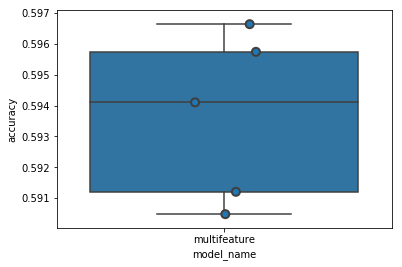

In [146]:
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

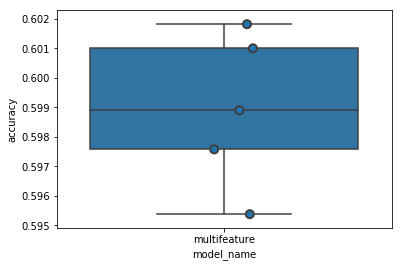

In [100]:
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [75]:
with open('data/multifeatureslinearsvc.txt', 'w+') as output:
    output.write(finalcrmultinomial)


In [76]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(alpha=1.1),
    LogisticRegression(C=1e2, random_state=0, fit_intercept=False),
]


CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

In [ ]:
for model in models:
    model_name = model.__class__.__name__
    combined_features = FeatureUnion(
        transformer_list=[
            ("bow", bow_pipeline),
            ("manual", manual_pipeline),
        ]
    )
    final_pipeline = Pipeline(
        steps=[
            ("combined_features", combined_features),
            ("classifier",model),
        ]
    )
    accuracies = cross_val_score(final_pipeline, X, Y, scoring='accuracy', cv=5)
    
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
    
    print(model_name + " done testing")

RandomForestClassifier done testing


C:\Users\siddh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC done testing


In [ ]:
cv_df.to_csv('data/multiplefeaturessklearn.csv')
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.savefig('figures/models/multiplefeaturessklearn.png')
plt.show()
plt.close()